5950
w0=[0.617423], w1=[-130.705293]
dMSE=[-0.099914,0.018306]
MSE=5078.154092


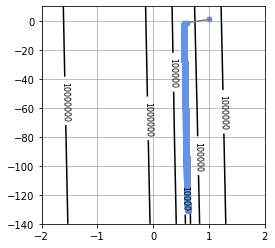

In [160]:
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 平均誤差関数
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    # 要素の平均を求める
    mse = npy.mean((y-t)**2)
    return mse

# 勾配
def dmse_line(x,t,w):
    y = w[0]*x + w[1]
    d_w0 = 2*npy.mean((y-t)*x)
    d_w1 = 2*npy.mean(y-t)
    return d_w0, d_w1


# 勾配法関数
def fit_line_func(x,t):
    # 初期パラメータ
    w_init = [1, 1]
    #　学習率
    alphax = 0.0000002
    alphay = 0.002
    
    max_roop = 100000
    eps = 0.1

    w_hist = npy.zeros([max_roop, 2])
    w_hist[0,:] = w_init
    for num in range(1, max_roop):
        dmse = dmse_line(x,t,w_hist[num -1])
        w_hist[num, 0] = w_hist[num-1,0] - alphax*dmse[0]
        w_hist[num, 1] = w_hist[num-1,1] - alphay*dmse[1]
        if (max(npy.isnan(npy.absolute(dmse)))):
            print(w_hist[num -3])
            break
                
        if max(npy.absolute(dmse)) < eps:
            break
        
    w0 = w_hist[num, 0]
    w1 = w_hist[num, 1]
    w_hist = w_hist[:num,:]
    return w0, w1, dmse, w_hist

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))

# MSEの等高線表示

xn = 100
w0_range = [-2, 2]
w1_range = [-140, 10]

w0 = npy.linspace(w0_range[0],w0_range[1],xn)
w1 = npy.linspace(w1_range[0],w1_range[1],xn)
# グリッドを作成する
ww0, ww1 = npy.meshgrid(w0, w1)
J = npy.zeros((len(w0), len(w1)))

for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(sample_data['X'],sample_data['Y'],(w0[i0], w1[i1]))


cont = plt.contour(ww0, ww1, J, 30, colors='black', levels=[1000,10000,100000, 1000000, 10000000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 勾配法
W0, W1, dMSE, W_history = fit_line_func(sample_data['X'],sample_data['Y'])

print(W_history.shape[0])
print('w0=[{0:.6f}], w1=[{1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(sample_data['X'], sample_data['Y'], [W0, W1])))
plt.plot(W_history[:,0],W_history[:,1], '.-',color='gray',markersize=10, markeredgecolor='cornflowerblue')
plt.show()


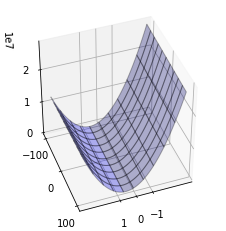

In [33]:
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 平均誤差関数
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    # 要素の平均を求める
    mse = npy.mean((y-t)**2)
    
    return mse

# データの読み込み
sample_data = npy.load('blog_data.npz')

# データの計算
xn = 100
w0_range = [-3, 3]
w1_range = [-100, 100]
w0 = npy.linspace(w0_range[0],w0_range[1],xn)
w1 = npy.linspace(w1_range[0],w1_range[1],xn)
# グリッドを作成する
ww0, ww1 = npy.meshgrid(w0, w1)
J = npy.zeros((len(w0), len(w1)))

for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(sample_data['X'],sample_data['Y'],(w0[i0], w1[i1]))

# 表示
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-100, 0, 100])
ax.set_zticks([0, 10000000, 20000000])
ax.view_init(40, 70)

plt.grid(True)
plt.show()



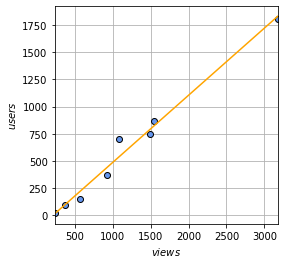

In [34]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# 最小二乗法により求めた関数
def f(x):
    return 0.617423*x -130.705293

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))
plt.plot(sample_data['X'],sample_data['Y'],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(sample_data['X_min'],sample_data['X_max'])

# 一次関数の図示する
xline = npy.linspace(sample_data['X_min'],sample_data['X_max'],100)
yline1 = f(xline)
plt.plot(xline, yline1, color ='orange')

# X軸に名前を付ける
plt.xlabel('$views$')
# Y軸に名前を付ける
plt.ylabel('$users$')
plt.grid(True)

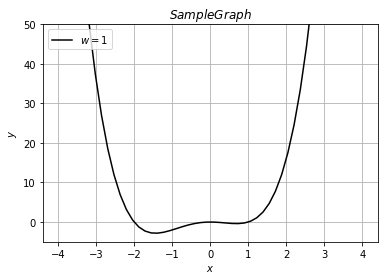

In [41]:
# ライブラリのインポート
import numpy as npy
import matplotlib.pyplot as plt
# Jupiter Notebookで結果を表示するためのおまじない
%matplotlib inline
# 関数の定義
def f(x,w):
    return x*(x-w)*(x+2)*x

# X軸に0から9までの配列
xline = npy.linspace(-4,4,50)
yline1 = f(xline,1)

# pltに要素を設定する
plt.plot(xline, yline1, color ='black', label='$w=1$')

# 凡例を表示する
plt.legend(loc="upper left")
# y軸の表示範囲を設定する
plt. ylim(- 5, 50)
# タイトルを表示する
plt.title('$SampleGraph$')
# X軸に名前を付ける
plt.xlabel('$x$')
# Y軸に名前を付ける
plt.ylabel('$y$')
# グリッドを表示する
plt.grid(True)

# グラフを描写する
plt.show()

In [44]:
# ライブラリのインポート
import numpy as npy

result = npy.sqrt(5078.154092)
print(round(result,2))

71.26
